In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

<h3>Importing data from CSV files</h3>

In [3]:
pizza_types = pd.read_csv('pizza/pizza_types.csv')
orders = pd.read_csv('pizza/orders.csv')
order_details = pd.read_csv('pizza/order_details.csv')
pizzas = pd.read_csv('pizza/pizzas.csv')

# Changing datatype of columns

orders['date'] = pd.to_datetime(orders['date'])   # Text to datetime

# orders
# pizza_types.columns
# order_details
pizzas.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')

<h3>Adding new columns to 'orders' table</h3></br>
<b>Created 'month', 'year', 'day', 'quarter' columns from 'date', which will facilitate comprehensive analysis.</b>

In [4]:
# adding month, day, quarter and Sale period column to order table

def month_name(date):
    month_num = date.month
    myList = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    return myList[month_num-1]

def weekday(date):
    daynum = date.weekday()
    myList = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    return myList[daynum]

def quarter(mon):
    if mon == 'Jan' or mon == 'Feb' or mon == 'Mar':
        return 'Q1'
    elif mon == 'Apr' or mon == 'May' or mon == 'Jun':
        return 'Q2'
    elif mon == 'Jul' or mon == 'Aug' or mon == 'Sep':
        return 'Q3'
    else:
        return 'Q4'
    
def Day_period(time):
    hour = int(time.split(':')[0])
    if hour >= 9 and hour < 17:
        return 'Day'
    else:
        return 'Night'

orders['year'] = orders['date'].apply(lambda x:x.year)
orders['month'] = orders['date'].apply(month_name)
orders['day'] = orders['date'].apply(weekday)
orders['quarter'] = orders['month'].apply(quarter)
orders['Sale period'] = orders['time'].apply(Day_period)
orders

,order_id,date,time,year,month,day,quarter,Sale period
0,1,2015-01-01,11:38:36,2015,Jan,Thu,Q1,Day
1,2,2015-01-01,11:57:40,2015,Jan,Thu,Q1,Day
2,3,2015-01-01,12:12:28,2015,Jan,Thu,Q1,Day
3,4,2015-01-01,12:16:31,2015,Jan,Thu,Q1,Day
4,5,2015-01-01,12:21:30,2015,Jan,Thu,Q1,Day
...,...,...,...,...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015,Dec,Thu,Q4,Night
21346,21347,2015-12-31,21:14:37,2015,Dec,Thu,Q4,Night
21347,21348,2015-12-31,21:23:10,2015,Dec,Thu,Q4,Night
21348,21349,2015-12-31,22:09:54,2015,Dec,Thu,Q4,Night


<h3>Transforming Data into a insightful structure</h3>

In [5]:
# Merging orders and order_details

order_merged = pd.merge(orders[['order_id', 'year', 'month', 'day', 'quarter', 'Sale period']], order_details, on = 'order_id')
order_merged = order_merged.drop('order_details_id', axis=1)
order_merged

,order_id,year,month,day,quarter,Sale period,pizza_id,quantity
0,1,2015,Jan,Thu,Q1,Day,hawaiian_m,1
1,2,2015,Jan,Thu,Q1,Day,classic_dlx_m,1
2,2,2015,Jan,Thu,Q1,Day,five_cheese_l,1
3,2,2015,Jan,Thu,Q1,Day,ital_supr_l,1
4,2,2015,Jan,Thu,Q1,Day,mexicana_m,1
...,...,...,...,...,...,...,...,...
48615,21348,2015,Dec,Thu,Q4,Night,ckn_alfredo_m,1
48616,21348,2015,Dec,Thu,Q4,Night,four_cheese_l,1
48617,21348,2015,Dec,Thu,Q4,Night,napolitana_s,1
48618,21349,2015,Dec,Thu,Q4,Night,mexicana_l,1


In [6]:
# Merging pizzas and pizza_types

pizza_merged = pd.merge(pizzas, pizza_types, on = 'pizza_type_id')
pizza_merged

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
...,...,...,...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
92,spinach_fet_l,spinach_fet,L,20.25,The Spinach and Feta Pizza,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
93,veggie_veg_s,veggie_veg,S,12.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."
94,veggie_veg_m,veggie_veg,M,16.00,The Vegetables + Vegetables Pizza,Veggie,"Mushrooms, Tomatoes, Red Peppers, Green Pepper..."


In [7]:
# Getting everything together for further analysis

order_price_merged = pd.merge(order_merged, pizza_merged[['pizza_id', 'name', 'category', 'size', 'price']], on = 'pizza_id')
order_price_merged['Total Sale'] = order_price_merged['quantity'] * order_price_merged['price']
order_price_merged

,order_id,year,month,day,quarter,Sale period,pizza_id,quantity,name,category,size,price,Total Sale
0,1,2015,Jan,Thu,Q1,Day,hawaiian_m,1,The Hawaiian Pizza,Classic,M,13.25,13.25
1,77,2015,Jan,Fri,Q1,Day,hawaiian_m,1,The Hawaiian Pizza,Classic,M,13.25,13.25
2,146,2015,Jan,Sat,Q1,Day,hawaiian_m,1,The Hawaiian Pizza,Classic,M,13.25,13.25
3,163,2015,Jan,Sat,Q1,Day,hawaiian_m,1,The Hawaiian Pizza,Classic,M,13.25,13.25
4,247,2015,Jan,Sun,Q1,Night,hawaiian_m,1,The Hawaiian Pizza,Classic,M,13.25,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,17492,2015,Oct,Sat,Q4,Night,the_greek_xxl,1,The Greek Pizza,Classic,XXL,35.95,35.95
48616,18139,2015,Nov,Thu,Q4,Night,the_greek_xxl,1,The Greek Pizza,Classic,XXL,35.95,35.95
48617,18789,2015,Nov,Tue,Q4,Day,the_greek_xxl,1,The Greek Pizza,Classic,XXL,35.95,35.95
48618,18919,2015,Nov,Thu,Q4,Day,the_greek_xxl,1,The Greek Pizza,Classic,XXL,35.95,35.95


<h3>Let the analysis begins !!</h3>

In [8]:
# How many varieties each category have across various sizes

pizza_count = pizza_merged.pivot_table(values='pizza_id', index='category', columns='size', aggfunc='count', fill_value=0, margins=True, margins_name='Total')
pizza_count

size,L,M,S,XL,XXL,Total
category,,,,,,
Chicken,6,6,6,0,0,18
Classic,8,8,8,1,1,26
Supreme,8,8,9,0,0,25
Veggie,9,9,9,0,0,27
Total,31,31,32,1,1,96


-- <b>Store has total 96 varieties on the menu and they are distributed across 4 primary categories and 5 sizes.</b></br>
<b>Classic, Supreme and Veggie have almost equal no of varieties; but Chicken have significantly lower diversity on the menu.</b><br/><b>Only Classic offers pizzas in XL and XXL size.</b>

In [9]:
# Average price of each catgory by size

category_price = order_price_merged.pivot_table(values='price', index='category', columns='size', aggfunc='mean', fill_value=0, margins=True, margins_name='Total')
category_price

size,L,M,S,XL,XXL,Total
category,,,,,,
Chicken,20.750000,16.750000,12.750000,0.0,0.00,17.709408
Classic,18.376850,14.739122,11.375021,25.5,35.95,14.797490
Supreme,20.652837,16.429972,14.048149,0.0,0.00,17.363229
Veggie,19.295383,15.938485,12.161352,0.0,0.00,16.612639
Total,19.802553,15.951219,12.364328,25.5,35.95,16.494132


<b>Average price of Classic is significantly lower than other categories in almost all sizes (except XL, XXL).</b>

In [10]:
# Total Revenue for various categories by sizes

category_vsale = order_price_merged.pivot_table(values='Total Sale', index='category', columns='size', aggfunc='sum', fill_value=0, margins=True, margins_name='Total')
category_vsale

size,L,M,S,XL,XXL,Total
category,,,,,,
Chicken,102339.0,65224.50,28356.00,0,0.0,195919.50
Classic,74518.5,60581.75,69870.25,14076,1006.6,220053.10
Supreme,94258.5,66475.00,47463.50,0,0.0,208197.00
Veggie,104202.7,57101.00,32386.75,0,0.0,193690.45
Total,375318.7,249382.25,178076.50,14076,1006.6,817860.05


<b>Classic have Highest Total Revenue Collection. It has got edge over other categories in Total Revenue is primary due to great margin in 'S' size revenue collection and also in 'XL' size where it have no competition.</b><br/>
<b>Although, Veggie got lowest Total Revenue Collection in year, but in size 'L', it has got maximum share.</b>

In [11]:
# Total Orders for various categories by different sizes

category_vcount = order_price_merged.pivot_table(values='order_id', index='category', columns='size', aggfunc='count', fill_value=0, margins=True, margins_name='Total')
category_vcount

size,L,M,S,XL,XXL,Total
category,,,,,,
Chicken,4799,3811,2205,0,0,10815
Classic,3987,4045,5975,544,28,14579
Supreme,4477,3977,3323,0,0,11777
Veggie,5263,3552,2634,0,0,11449
Total,18526,15385,14137,544,28,48620


<b>Orders trend is not much different than Revenue. But one interesting information is in there.</b><br/>
<b>In 'M' size pizzas, Classic have maximum orders, but in Revenue collection of 'M' size pizzas, Classic stands at 3rd position.</b>

In [43]:
# ===================================================================================
# Which are top 10 pizzas by revenue and orders?
# ===================================================================================

# Top 10 Pizzas by Revenue
display(Markdown("### Top 10 Pizzas by Revenue"))
order_price_merged2 = order_price_merged.groupby(['name', 'category']).agg({'Total Sale':'sum', 'order_id' : 'count'}).sort_values(by='Total Sale', ascending=False).rename(columns = {'order_id':'Total Orders'})
order_price_merged2.head(10)

### Top 10 Pizzas by Revenue

,,Total Sale,Total Orders
name,category,,
The Thai Chicken Pizza,Chicken,43434.25,2315
The Barbecue Chicken Pizza,Chicken,42768.00,2372
The California Chicken Pizza,Chicken,41409.50,2302
The Classic Deluxe Pizza,Classic,38180.50,2416
The Spicy Italian Pizza,Supreme,34831.25,1887
The Southwest Chicken Pizza,Chicken,34705.75,1885
The Italian Supreme Pizza,Supreme,33476.75,1849
The Hawaiian Pizza,Classic,32273.25,2370
The Four Cheese Pizza,Veggie,32265.70,1850


<b>In top 10 Pizzas, 4 are of Chicken Category and Veggie has only one in the list.</b>

In [44]:
# Top 10 Pizzas by orders
display(Markdown("### Top 10 Pizzas by Orders"))
order_price_merged2 = order_price_merged.groupby(['name', 'category']).agg({'Total Sale':'sum', 'order_id' : 'count'}).sort_values(by='order_id', ascending=False).rename(columns = {'order_id':'Total Orders'})
order_price_merged2.head(10)

### Top 10 Pizzas by Orders

,,Total Sale,Total Orders
name,category,,
The Classic Deluxe Pizza,Classic,38180.50,2416
The Barbecue Chicken Pizza,Chicken,42768.00,2372
The Hawaiian Pizza,Classic,32273.25,2370
The Pepperoni Pizza,Classic,30161.75,2369
The Thai Chicken Pizza,Chicken,43434.25,2315
The California Chicken Pizza,Chicken,41409.50,2302
The Spicy Italian Pizza,Supreme,34831.25,1887
The Sicilian Pizza,Supreme,30940.50,1887
The Southwest Chicken Pizza,Chicken,34705.75,1885


<b>Here also, 4 are from Chicken but 3 are from Classic suggesting that Classic has great demand but its Revenue appears lower due to lower pricing.</b>

<h3>Time For Visualisation !!</h3>

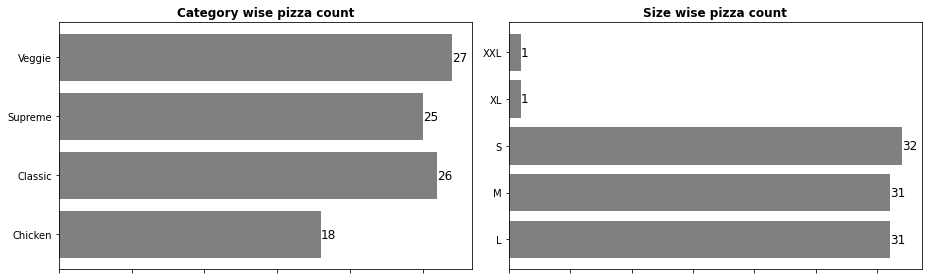

In [13]:
# ============================================================================================
# How much variety customer get size wise and category wise? 
# ============================================================================================

#Category-wise total pizzas
category_count = pizza_merged.pivot_table(values='pizza_id', index='category', aggfunc='count')
category_count = category_count.rename(columns={'pizza_id':'Total Varieties'})

#Size-wise total pizzas
size_count = pizza_merged.pivot_table(values='pizza_id', index='size', aggfunc='count')
size_count = size_count.rename(columns={'pizza_id':'Total Varieties'})

fig, axes = plt.subplots(1, 2, figsize = (13, 4))

bars1 = axes[0].barh(category_count.index, category_count['Total Varieties'], color='grey')
axes[0].set_title('Category wise pizza count', fontweight = 'bold', fontsize = 12)
axes[0].bar_label(bars1, fontsize = 12, label_type = 'edge')  # How to add bar labels
                                                            # label_type have two values ==> edge or center
axes[0].tick_params(axis='x', labelbottom=False) #This will hide the tick labels of axis    

bars2 = axes[1].barh(size_count.index, size_count['Total Varieties'], color='grey')
axes[1].set_title('Size wise pizza count', fontweight = 'bold', fontsize = 12)
axes[1].bar_label(bars2, fontsize = 12, label_type = 'edge')

axes[1].tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()

<b>As already discussed, Chicken got lower varieties on the table, other categories are almost at the same level.</b><br/>
<b>Size 'L', 'M', 'S' got almost 98% share in total pizza varieties.</b>

In [14]:
# Monthly Sales and Orders Trend for 2015 

monthly_sales = order_price_merged.pivot_table(values = ['Total Sale', 'quantity'], index = 'month', aggfunc = 'sum').rename(columns={'quantity':'quantity sold'})
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [15]:
monthly_orders = order_price_merged.pivot_table(values = 'order_id', index='month', aggfunc='count').rename(columns = {'order_id':'Total Orders'})                                    

In [16]:
monthly_data_merged = pd.merge(monthly_sales, monthly_orders, on='month')
monthly_data_merged.index = pd.CategoricalIndex(monthly_data_merged.index, categories=custom_order, ordered=True)
monthly_data_merged = monthly_data_merged.sort_index()
monthly_data_merged

,Total Sale,quantity sold,Total Orders
month,,,
Jan,69793.30,4232,4156
Feb,65159.60,3961,3892
Mar,70397.10,4261,4186
Apr,68736.80,4151,4067
May,71402.75,4328,4239
Jun,68230.20,4107,4025
Jul,72557.90,4392,4301
Aug,68278.25,4168,4094
Sep,64180.05,3890,3819


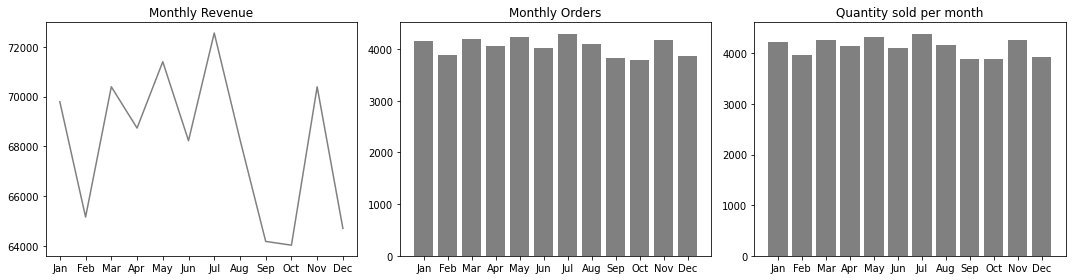

In [17]:
months = monthly_data_merged.index
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(months, monthly_data_merged['Total Sale'], color='grey')
axes[0].set_title('Monthly Revenue')
axes[1].bar(months, monthly_data_merged['Total Orders'], color='grey')
axes[1].set_title('Monthly Orders')
axes[2].bar(months, monthly_data_merged['quantity sold'], color='grey')
axes[2].set_title('Quantity sold per month')
plt.tight_layout()
plt.show()

<b>Total Revenue was showing a positive trend until the July. But after July we saw drastic drop in chart which recovered to some extent in November, but again it went under serious loss in December.</b><br/>
<b>Same trend we can see in monthly orders chart.</b></br>
<b>Among all orders, only in 2% orders the quantity sold is more than 1. That's why 'Orders' and 'Quantity sold' charts are almost identical.</b>

<b>Let's have quaterly revenue and orders trend chart for more broad perspective.</b>

In [18]:
# Quaterly Sales and Orders Trend for 2015

quarterly_sales = order_price_merged.pivot_table(values = ['Total Sale', 'quantity'], index = 'quarter', aggfunc = 'sum').rename(columns={'quantity':'quantity sold'})
quarterly_orders = order_price_merged.pivot_table(values = 'order_id', index='quarter', aggfunc='count').rename(columns = {'order_id':'Total Orders'})

In [19]:
quarterly_data_merged = pd.merge(quarterly_sales, quarterly_orders, on='quarter')
quarterly_data_merged = quarterly_data_merged.sort_index()
quarterly_data_merged

,Total Sale,quantity sold,Total Orders
quarter,,,
Q1,205350.00,12454,12234
Q2,208369.75,12586,12331
Q3,205016.20,12450,12214
Q4,199124.10,12084,11841


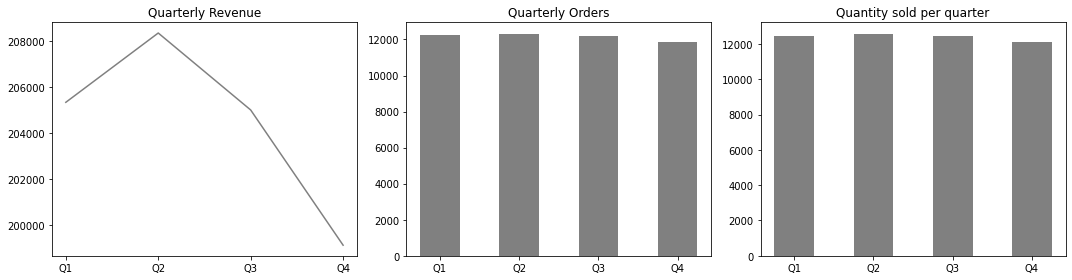

In [20]:
quarters = quarterly_data_merged.index
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(quarters, quarterly_data_merged['Total Sale'], color='grey')
axes[0].set_title('Quarterly Revenue')
axes[1].bar(quarters, quarterly_data_merged['Total Orders'], color='grey', width=0.5)
axes[1].set_title('Quarterly Orders')
axes[2].bar(quarters, quarterly_data_merged['quantity sold'], color='grey', width=0.5)
axes[2].set_title('Quantity sold per quarter')
plt.tight_layout()
plt.show()

<b>Here we can see more clear picture. Sales are going down constantly after reaching its peak in Q2.</b></br>
<b>More interesting fact is, though orders are also going down, but that trend is not as drastic as revenue trend.</b></br>
<b>From quarter 2, where both orders and revenue were at their peak, to quarter 4 the percentage drop in revenue and orders is ==></b><br>
<b>Percent drop in revenue = 4.43%</b></br>
<b>Percent drop in orders = 3.97%</b>

<b>Revenue is going down, Orders are going down. But it's a collective impact of pizzas from all categories and sizes.</b><br/>
<b>So let's analyze the trends category-wise.</b>

In [21]:
# Total orders analysis of each category over quarters

quarter_wise_category = order_price_merged.pivot_table(values='order_id', index='quarter', columns='category', aggfunc='count')
quarter_wise_category

category,Chicken,Classic,Supreme,Veggie
quarter,,,,
Q1,2734,3607,2945,2948
Q2,2709,3700,3034,2888
Q3,2739,3735,2860,2880
Q4,2633,3537,2938,2733


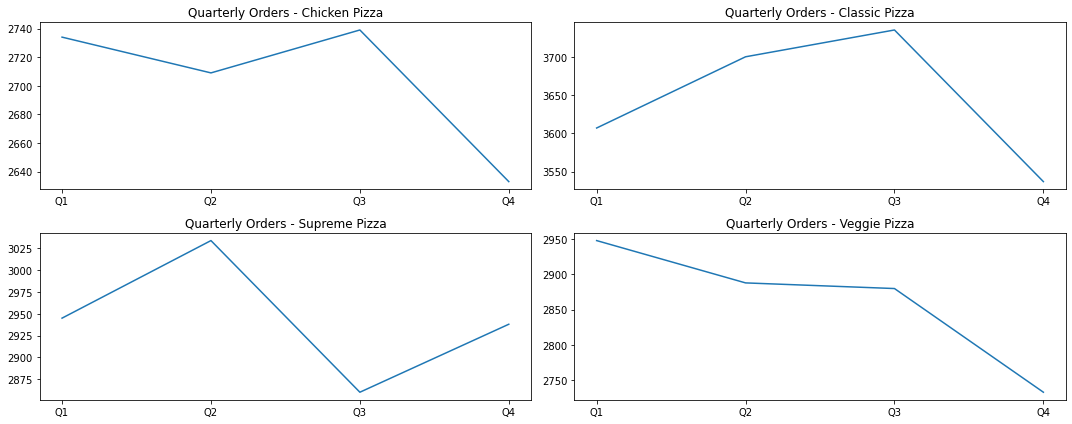

In [22]:
ch_sale, cl_sale, su_sale, ve_sale = quarter_wise_category['Chicken'], quarter_wise_category['Classic'], quarter_wise_category['Supreme'], quarter_wise_category['Veggie']
fig, axes = plt.subplots(2, 2, figsize=(15, 6))
axes[0, 0].plot(quarters, ch_sale)
axes[0, 0].set_title('Quarterly Orders - Chicken Pizza')
axes[0, 1].plot(quarters, cl_sale)
axes[0, 1].set_title('Quarterly Orders - Classic Pizza')
axes[1, 0].plot(quarters, su_sale)
axes[1, 0].set_title('Quarterly Orders - Supreme Pizza')
axes[1, 1].plot(quarters, ve_sale)
axes[1, 1].set_title('Quarterly Orders - Veggie Pizza')
plt.tight_layout()
plt.show()

<b>Every category (Except Supreme) has shown drastic drop in last quarter. But Veggie is constantly declining.</b></br>
<b>By how much percent the orders are dropped from Q1 ==> </b></br>
<b>Chicken = 3.69%</b></br>
<b>Classic = 1.94%</b></br>
<b>Supreme = 0.23%</b></br>
<b>Veggie = 7.29%</b></br>
<b>Although all categories are declining, Veggie needs serious introspection.<b>

<b>So let's do the category-wise analysis.</b>

In [23]:
# Category wise Comparison

category_sales = order_price_merged.pivot_table(values='Total Sale', index='category', aggfunc='sum')
category_orders = order_price_merged.pivot_table(values='order_id', index='category', aggfunc='count').rename(columns={'order_id':'Total Orders'})
category_data = pd.merge(category_sales, category_orders, on='category')
category_data_merged = pd.merge(category_data, category_count, on='category')
category_data_merged['Revenue per order'] = round(category_data_merged['Total Sale'] / category_data_merged['Total Orders'], 2)
category_data_merged['Revenue per variety'] = round(category_data_merged['Total Sale'] / category_data_merged['Total Varieties'], 2)
category_data_merged

,Total Sale,Total Orders,Total Varieties,Revenue per order,Revenue per variety
category,,,,,
Chicken,195919.50,10815,18,18.12,10884.42
Classic,220053.10,14579,26,15.09,8463.58
Supreme,208197.00,11777,25,17.68,8327.88
Veggie,193690.45,11449,27,16.92,7173.72


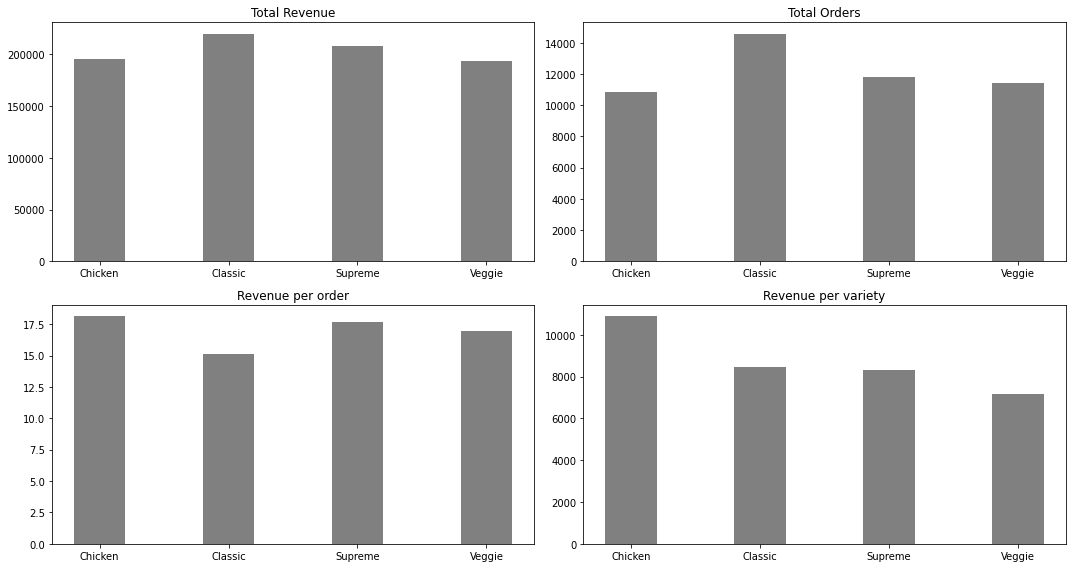

In [24]:
categories = category_data_merged.index
fig, axes = plt.subplots(2,2, figsize=(15, 8))
axes[0,0].bar(categories, category_data_merged['Total Sale'], color='grey', width = 0.4)
axes[0,0].set_title('Total Revenue')
axes[0,1].bar(categories, category_data_merged['Total Orders'], color='grey', width = 0.4)
axes[0,1].set_title('Total Orders')
axes[1,0].bar(categories, category_data_merged['Revenue per order'], color='grey', width = 0.4)
axes[1,0].set_title('Revenue per order')
axes[1,1].bar(categories, category_data_merged['Revenue per variety'], color='grey', width = 0.4)
axes[1,1].set_title('Revenue per variety')
plt.tight_layout()
plt.show()

<b>Key takeaways :-</b>
<ul>
  <li>Classic have maximum total revenue.</li>
  <li>Classic also have maximum orders but the margin it has over other categories for total orders is notable.</li>
  <li>Classic has maximum revenue and maximum orders (with significant margin) but the bar drops significantly in case of revenue per order and revenue per variety.</li>
  <li>Chicken is ahead of everyone with great margin in revenue per variety due to its less diversity in the menu.</li>
  <li>Veggie has minimum revenue per variety suggesting the need to eliminate some underperforming pizza types.</li>
  <li>Classic has maximum orders but minimum revenue per order suggests that it may be underpriced.</li>  
</ul> 

In [25]:
size_sales = order_price_merged.pivot_table(values='Total Sale', index='size', aggfunc='sum')
size_orders = order_price_merged.pivot_table(values='order_id', index='size', aggfunc='count').rename(columns={'order_id':'Total Orders'})
size_orders_merged = pd.merge(size_sales, size_orders, on='size')
size_orders_merged['Revenue per order'] = round(size_orders_merged['Total Sale']/size_orders_merged['Total Orders'], 2)
size_orders_merged

,Total Sale,Total Orders,Revenue per order
size,,,
L,375318.70,18526,20.26
M,249382.25,15385,16.21
S,178076.50,14137,12.60
XL,14076.00,544,25.88
XXL,1006.60,28,35.95


In [26]:
custom_order2 = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
day_sale = order_price_merged.pivot_table(values='Total Sale', index='day', columns='Sale period', aggfunc='sum')
day_sale2 = order_price_merged.pivot_table(values='Total Sale', index='day', columns='quarter', aggfunc='sum')
day_sale.index = pd.CategoricalIndex(day_sale.index, categories=custom_order2, ordered=True)
day_sale = day_sale.sort_index()
day_sale['Total'] = day_sale['Day'] + day_sale['Night']
day_sale2

quarter,Q1,Q2,Q3,Q4
day,,,,
Fri,33667.60,35642.40,33642.85,33121.05
Mon,28414.50,30871.00,27990.85,20053.20
Sat,30064.35,31330.85,31818.85,29968.35
Sun,25436.35,24377.75,24393.15,24996.25
Thu,29694.80,30026.10,26729.35,37078.25
Tue,30953.05,27617.15,28981.55,26582.05
Wed,27119.35,28504.50,31459.60,27324.95


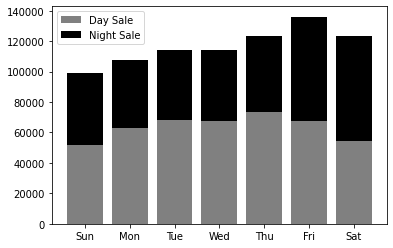

In [27]:
# Total Sales Trend over different weekdays and sales times

day_time, night_time, days = day_sale['Day'], day_sale['Night'], day_sale.index
plt.bar(days, day_time, label='Day Sale', color='grey')
plt.bar(days, night_time, label='Night Sale', bottom=day_time, color='black')
plt.legend()
plt.show()

<b>On Thursday, Friday and Saturday maximum sales happens and this trend is true in every quarter.</b></br>
<b>Only on saturday Night sale is higher than Day sale.</b>

<h3>Key Insights and Recommendations:</h3>

<h4>Insights :</h4>
<ul>
    <li>Total Revenue is constantly decling from quarter 2.</li>
    <li>Total Revenue and Orders got big drops in month of August and September.</li>
    <li>Among all categories, 'Veggie' has shown drastic decline in both, orders and revenue.</li>
    <li>'Classic' has highest total revenue and orders.</li>
    <li>In 'S' and 'M' size pizzas, 'Classic' has highest demand.</li>
    <li>In 'L' size pizzas 'Veggie' has highest demand.</li>
    <li>Average price for 'Classic' is significantly lower than other categories. Hence, 'Classic' has minimum Revenue per order</li>
    <li>Chicken has highest revenue per variety, because Chicken has lowest varieties and highest average price. That has given it great edge over other categories in revenue per variety.</li>
    <li>In top 10 pizzas by revenue, 4 are from 'Chicken' and 3 are from 'Supreme'.</li>
    <li>In top 10 pizzas by orders, 4 are from 'Chicken' and 3 are from 'Classic'.</li>
    <li>Maximum sale happens on Friday. Other than Friday, Thursday and Saturday are important days for sale.</li>
</ul>

<h4>Recommendations:</h4>
<ul>
    <li>In case of Veggie, underperforming varieties should be eliminated. Sometimes, too many varieties ruins customer experience. Also, less varieties will save the cost, increase the profit margin.</li>
    <li>Veggie has great demand in 'L' size pizzas, owner should think of giving offers/discounts on L size pizzas to increase the sale.</li>
    <li>Price of 'Classic' category pizzas should be increased, atleast for the 'S' size.</li>
    <li>Eliminating some of the varieties from Classic will be beneficial (Especially from 'L' size, because Classic have minimum demand there).</li>
    <li>Owner should focus on Classic and Chicken category pizzas for marketing, especially those who are in top 10 list.</li>
    <li>Chicken should have new variety in XL or XXL size category.</li>
    <li>Owner should think of giving some offers/discounts on Chicken and Supreme pizzas on Thursday, Friday, since they have high prices, in order to increase the demand.</li>
    <li>Elimination of varieties should happen across every category, but veggie should priority.</li>
</ul>